In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#From
#https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey
sdss=pd.read_csv('/Users/sdodelso/AI_Institute/Course/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [3]:
sdss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [4]:
## Convert class column to integer
sdss["class"]=np.where(sdss["class"]=='QSO','2',sdss["class"])#.astype(int)
sdss["class"]=np.where(sdss["class"]=='STAR','0',sdss["class"])#.astype(int)
sdss["class"]=np.where(sdss["class"]=='GALAXY','1',sdss["class"])#.astype(int)
sdssc=sdss.astype({'class':int})
sdssc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  int64  
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(8)
memory usage: 1.4 MB


In [5]:
sdssc.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.669800,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.625465,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,1.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


<AxesSubplot:xlabel='ra', ylabel='dec'>

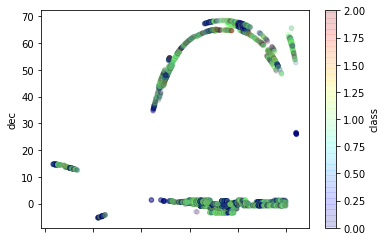

In [6]:
#Visualize the data
sdssc.plot(kind="scatter",x="ra",y="dec",c="class",alpha=0.1,cmap=plt.get_cmap("jet"),colorbar=True)

<AxesSubplot:xlabel='redshift', ylabel='plate'>

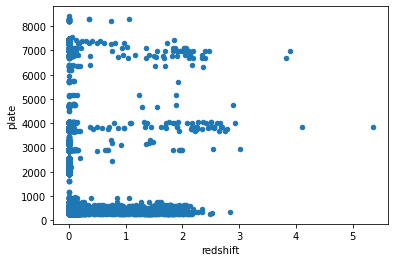

In [7]:
sdssc.plot(kind="scatter",x='redshift',y='plate')
#This is going to cause problems, because there are really weird, nonlinear correlations that will mess things up

(8000, 18)
(8000,)


(array([6.424e+03, 9.300e+02, 5.100e+01, 3.300e+01, 2.900e+01, 2.300e+01,
        2.900e+01, 2.900e+01, 3.300e+01, 2.700e+01, 3.100e+01, 3.800e+01,
        4.000e+01, 3.100e+01, 3.500e+01, 3.900e+01, 3.800e+01, 3.600e+01,
        2.800e+01, 2.300e+01, 1.800e+01, 1.000e+01, 4.000e+00, 9.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-4.13607800e-03,  1.03023724e-01,  2.10183525e-01,  3.17343327e-01,
         4.24503128e-01,  5.31662930e-01,  6.38822731e-01,  7.45982533e-01,
         8.53142334e-01,  9.60302136e-01,  1.06746194e+00,  1.17462174e+00,
         1.28178154e+00,  1.38894134e+00,  1.49610114e+00,  1.60326095e+00,
         1.71042075e+00,  1.81758055e+00,  1.92474035e+00,  2.03190015e+

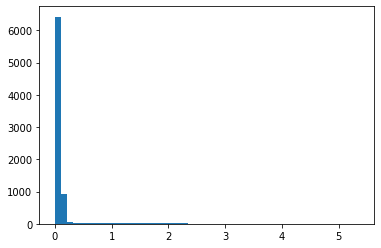

In [8]:
#Get a training set 
X_train_full=sdssc[:8000]
y_train_label=X_train_full["redshift"]
print(X_train_full.shape)
print(y_train_label.shape)
# Look at correlations
corr_matrix=X_train_full.corr()
corr_matrix["redshift"].sort_values(ascending=False)
#corr_matrix["class"].sort_values(ascending=False)
plt.hist(y_train_label,bins=50)

In [9]:
X_train=X_train_full.drop("redshift",axis=1)#,inplace=True)
print(X_train_full.shape,X_train.shape)

(8000, 18) (8000, 17)


Score= 0.0016531700517375958


'The coefficient R^2 is defined as (1-u/v), where u is the residual \nsum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum \nof squares ((y_true - y_true.mean()) ** 2).sum()'

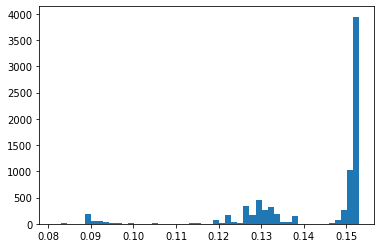

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
result=lin_reg.fit(X_train,y_train_label)
plt.hist(lin_reg.predict(X_train),bins=50)
##There are a variety of scores one can use.
## The simplest is the one in the method:
print('Score= '+str(lin_reg.score(X_train,y_train_label)))
'''The coefficient R^2 is defined as (1-u/v), where u is the residual 
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum 
of squares ((y_true - y_true.mean()) ** 2).sum()'''


In [11]:
### Clearly, does not work so well. Let's see why.
### Some of its attributes
coeff=result.coef_
print((coeff))
### The problem is the mismatched amplitudes of the features


[ 1.42054841e-52  0.00000000e+00 -2.86507544e-38 -6.55253365e-38
  3.22320987e-38  2.68932429e-38  2.09574963e-38 -1.73761520e-38
 -3.96441550e-36  0.00000000e+00  1.37616471e-39  3.60787278e-37
 -7.79923896e-21 -1.79067215e-39  6.79128994e-38  3.17832369e-35
  1.61293136e-37]


[ 2.42434976e-20 -1.75893032e-04 -2.81986867e-04 -8.16875598e-02
  3.55724847e-02 -1.97856117e-01  1.12761866e-02  2.57777170e-01
 -2.25890893e-05  2.91509787e-06  1.00917842e-03  9.62363583e-05
  3.33518524e-15  5.09374750e-01 -3.75513168e+00  1.23636302e-04
 -9.28423057e-04]
[-0.26273883 -0.2934733 ]
0   -0.000009
1   -0.000055
Name: redshift, dtype: float64
Score= 0.6026366085710293


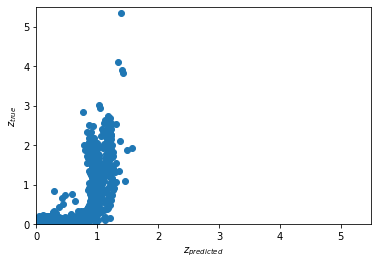

In [309]:
### Do it again this time normalizing:
lin_reg=LinearRegression(normalize=True)
result_norm=lin_reg.fit(X_train,y_train_label)
coeff_norm=result_norm.coef_
print(coeff_norm)
print(lin_reg.predict(X_train[:2]))
#print((X_train_full[:2]))
print(y_train_label[:2])
#plt.hist(lin_reg.predict(X_train_full),bins=50)
plt.scatter(lin_reg.predict(X_train),y_train_label)
plt.xlabel('$z_{predicted}$')
plt.ylabel('$z_{true}$')
plt.axis([0,5.5,0,5.5])
print('Score= '+str(lin_reg.score(X_train,y_train_label)))


In [310]:
### This does better but still not well. 
### Look at the coefficients that are largest here are:
ind=np.argsort(np.abs(coeff_norm))
for i in ind:
    print(X_train.columns[i],coeff_norm[i])
print(X_train.columns)

objid 2.4243497590305403e-20
specobjid 3.3351852409905164e-15
rerun 2.9150978662073612e-06
run -2.2589089282925396e-05
field 9.623635825549458e-05
mjd 0.00012363630172444612
ra -0.0001758930324538462
dec -0.00028198686744150206
fiberid -0.0009284230568181713
camcol 0.0010091784218195698
i 0.011276186601795527
g 0.035572484721908625
u -0.0816875597850755
r -0.19785611657835087
z 0.2577771698779524
class 0.5093747501057637
plate -3.7551316843880076
Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'plate', 'mjd', 'fiberid'],
      dtype='object')


It makes sense that the colors and the type have relatively large coefficients and the class since stars will have very low redshifts and galaxies and QSO'S will have much larger ones. (It does not make sense to me that plate carries any weight.) Indeed it seems likely that the problem is that the class coefficient is trying to push all the stars to have low z and might even be doing that correctly. Let's see.

()


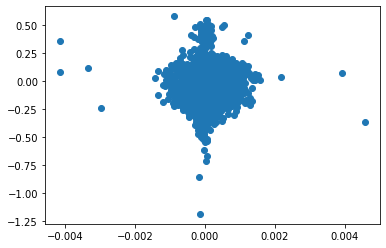

In [311]:
stars=X_train[X_train["class"]==0]
starz=y_train_label[X_train["class"]==0]
print(np.shape(result_norm))
stars_predict=result_norm.predict(stars)
plt.scatter(starz,stars_predict)
plt.show()

Still does not do very well. Let's fit the stars only

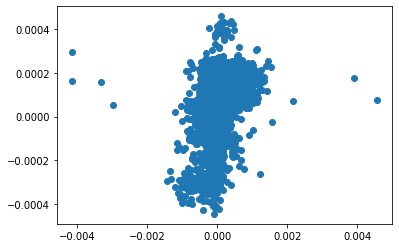

In [312]:
stars_predict=lin_reg.fit(stars,starz)
plt.scatter(starz,stars_predict.predict(stars))
plt.show()

In [313]:
#Still does not do well; let's look at the coefficients:
stars_co=stars_predict.coef_
ind=np.argsort(np.abs(stars_co))
for i in ind:
    print(X_train.columns[i],stars_co[i])


objid 7.56826315197272e-23
specobjid -1.1614198938732283e-18
rerun 1.2208900557197921e-10
class 2.9055513550702017e-10
mjd 3.444993737203097e-08
run -3.2975994743729206e-07
fiberid 3.298863373446699e-07
field -7.762013347197355e-07
camcol -1.0170333448267791e-06
ra 1.125298854499803e-06
dec -3.470690273084698e-06
i -1.1558476543909375e-05
z -1.947920264178276e-05
g 2.919160479472204e-05
u -3.267618055366696e-05
r 4.60541863078619e-05
plate 0.0013076215988152113


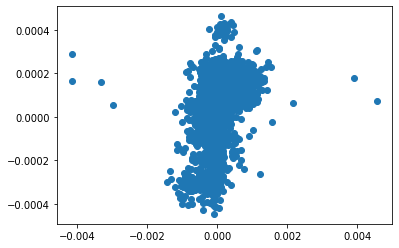

In [315]:
# The plate deature may be causing all the problems. Let's remove that and see what happens.
X_train_np=X_train.drop("plate",axis=1)#,inplace=True)
stars=X_train_np[X_train_np["class"]==0]
starz=y_train_label[X_train_np["class"]==0]
stars_predict=lin_reg.fit(stars,starz)
plt.scatter(starz,stars_predict.predict(stars))
plt.show()

In [316]:
#Still does not do well; let's look at the coefficients:
stars_co=stars_predict.coef_
ind=np.argsort(np.abs(stars_co))
for i in ind:
    print(X_train_full.columns[i],stars_co[i])


class 0.0
specobjid -1.8674170796059264e-23
objid 7.568263151972721e-23
rerun -6.613633252161577e-18
plate 1.0957377373504488e-08
redshift 3.4478863453480476e-08
run -3.295868201558269e-07
field -7.770568494110696e-07
camcol -1.0289173073389898e-06
ra 1.1275922786620005e-06
dec -3.4744169575300873e-06
i -1.1367541520878301e-05
z -1.9679301935310795e-05
g 2.900397138949407e-05
u -3.266364155519483e-05
r 4.621095030268859e-05


In [317]:
# That's not the problem. Let's see the score
print('Score= '+str(lin_reg.score(stars,starz)))


Score= 0.14033152663314052


Score= 0.3233106471941406


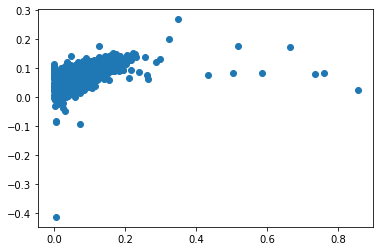

In [318]:
# Maybe there are too many types of stars to do well. Let's try it on galaxies.
galaxies=X_train_np[X_train_full["class"]==1]
galaxies_z=y_train_label[X_train_full["class"]==1]
galaxies_predict=lin_reg.fit(galaxies,galaxies_z)
plt.scatter(galaxies_z,galaxies_predict.predict(galaxies))
print('Score= '+str(lin_reg.score(galaxies,galaxies_z)))
plt.show()

objid 0.0
specobjid -1.451314900226078e-19
rerun 5.329070518200751e-15
class 7.105427357601002e-15
run 7.79656569570236e-05
plate 0.00012548536061268684
ra 0.0001920769078793085
field 0.00029466567846620097
redshift 0.00032450187173579096
dec -0.0029540664477517163
camcol -0.01845987319970449
u 0.12225701972746957
i -0.7541308203022823
z 0.7573853065773377
g -0.8948261168590499
r 1.0036026666445217


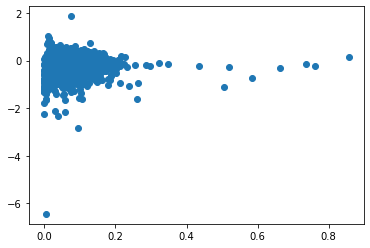

In [323]:
#That looks ok
gals_co=galaxies_predict.coef_
ind=np.argsort(np.abs(gals_co))
for i in ind:
    print(X_train_full.columns[i],gals_co[i])
plt.scatter(galaxies_z,(galaxies_z-galaxies_predict.predict(galaxies))/(1.+galaxies_z))
plt.show()

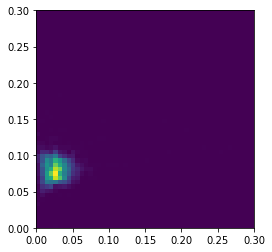

In [326]:
# Heatmap is cooler
heatmap, xedges, yedges = np.histogram2d(galaxies_z,galaxies_predict.predict(galaxies), bins=50)
extent = [0,.3,0,.3]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

Finally try it on QSOs

Score= 0.3079587529672718


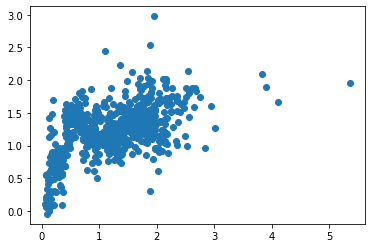

In [320]:
qso=X_train_np[X_train_full["class"]==2]
qso_z=y_train_label[X_train_full["class"]==2]
qso_predict=lin_reg.fit(qso,qso_z)
plt.scatter(qso_z,qso_predict.predict(qso))
print('Score= '+str(lin_reg.score(qso,qso_z)))
plt.show()